# Let's look at a very simple example of an optimization problem

### We have data corresponding to 5 different houses: their size and their cost
### The task is to correctly predict the prices of the house

In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


In [56]:

# Dataset: House sizes (in square feet) and their corresponding prices (in €)
house_sizes = np.array([600, 800, 1000, 1200, 1400])
house_prices = np.array([550, 610, 740, 810, 950])


In [57]:
plt.plot(house_sizes, house_prices, 'ro')
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (€)')

Text(0, 0.5, 'House Price (€)')

### Since the distribution looks like a straight line (more or less), one way to predict the house prices is to fit a straight line through the data

### Let's try to build a straight line $f(x): y = mx + c$ through the distribution

In [58]:
# Hypothesis function: h(x) = m * x + c
def hypothesis(m, c, x):
    return  m * x + c


And try to put some arbitrary values and see what comes out

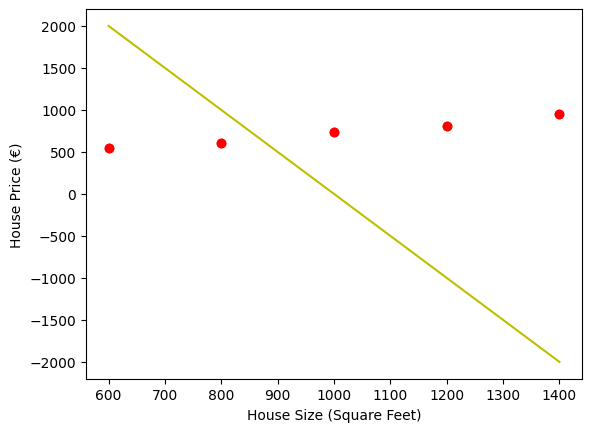

In [59]:
preds = hypothesis(-5, 5000, house_sizes) # Random values for m and c
plt.plot(house_sizes, house_prices, 'ro')
plt.plot(house_sizes, preds, 'y-') 
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (€)')
plt.show()

### What we want is: $y_{\text{prediction}} = \text{hypothesis}(m_{\text{calculated in some way}}, c_{\text{calculated in some way}}, \text{desired house price = x} )$.
Needless to say, the yellow line is way off from our red distribution. We need to change the slope and $y$ intercept of the line in some way to move the line closer to the red points

Let us now build a metric, a cost function, which lets us measure "How far off are we from the desired straight line"

A very simple cost function in this case would be to measure the distances from the red points to the hypothesised straight line. I.e For every red point in our dataset, we want to measure the vertical distance from the point to the line directly above or below the point

In [60]:
def cost(m,x,c,y):
    return (y - hypothesis(m,c,x))

Now we want to check how erroneous (how far) is our hypothesized line from the actual data points.

In [61]:
house_sizes = np.array([600, 800, 1000, 1200, 1400])
house_prices = np.array([550, 610, 740, 810, 950])

-1400
-200
1000
2200
3400


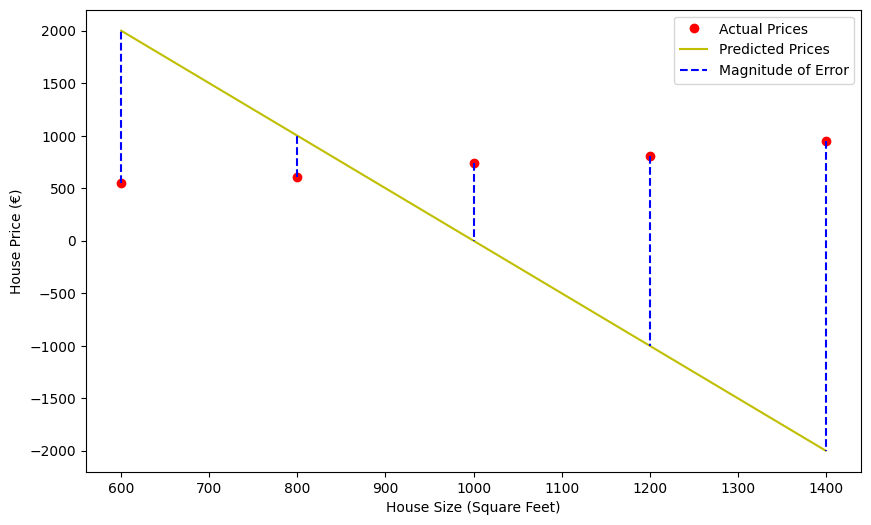

In [62]:
preds = hypothesis(-5, 5000, house_sizes) # Random values for m and c

# Create pairs of points for visualization
points = []
for i in range(len(house_sizes)):
    points.append(([house_sizes[i], house_sizes[i]], [house_prices[i], preds[i]])) # ([x1, x2], [y1, y2])

# Plotting
plt.figure(figsize=(10, 6))

# Plot the actual points
plt.plot(house_sizes, house_prices, 'ro', label='Actual Prices')

# Plot the predicted points
plt.plot(house_sizes, preds, 'y-', label='Predicted Prices')

# Plot the loss lines
for p in points:
    plt.plot(p[0], p[1], 'b--')
    print(p[0][1] - p[1][1])

plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (€)')
plt.legend(['Actual Prices', 'Predicted Prices', 'Magnitude of Error'])
plt.show()


In our case, we want all of the red points to influence how the yellow line should change. That indicates we should sum the contributions of each point: how far from that particular point is the line?

Thus our loss, $L = \sum{(\text{predicted value, y'} - \text{actual value, y})}\ \forall \text{points in the dataset}$

However we see that the value of the distance from the line to the points can be negative or positive. This negatively impacts the sum contribution. Thus we can take either the absolute (mod magnitude) of the difference of points, or we can eliminate negative numbers by squaring the expression. 

Thus

$$L = \sum_{M}{(y' - y)}^2, M = ||\text{data set}||$$

However this expression still tells us how much should all the points combined together, change the parameters of the line. And since we took $M$ number of points into account (as our dataset size is $M$) we want to divide the loss by $M$ to get the correct scaled value

$$L = \frac{1}{2M}\cdot\sum_{M}{(y' - y)}^2, M = ||\text{data set}||$$

Thus, this is the loss function we are going to work with. This is also known as sum of squared error (SSE). We will later see why we divided by $2M$ and not just $M$. And then we will also see why squaring is prefered over taking the absolute value (Hint: It has to do with the ease of differentiating polynomials)

In simple words: we designed our cost or loss function in such a way it captures the contribution of all the points towards the error in predicting house prices, then we also divide by the number of observation to have a correct idea of how "much" is the error

* Note: There are analytical ways of solving systems of linear equation, but in this series we are not going to explore them. These analytical or rather linear algebraic ways of solving such equations involve matrix multiplication and lease square optimization. Which are $O(n^3)$ operations. We on the other hand are trying to solve for optimal values of $m,c$, our parameters for the line in a iterative way

In [63]:
# Cost function: Mean Squared Error
def cost_function(m, c, x, y):
    M = len(y)
    return (1/(2*M)) * np.sum((hypothesis(m, c, x) - y)**2)


### Remember minima-maximima from high school calculus?

Maxima and mimima are points where a function reaches its highest or lowest values. The derivative of the function gives the rate of change of that function. At maxima or minima, the derivative is zero, because the function isn't changing at that exact point. (it's flat at the top of a peak bottom of a valley). 

![parabola](./parabola.png)

differentiation tells us how $L$ changes when we adjust the slope $m$ or the intercept $c$. For a given $m$ and $c$ the SSE function will give us a particular value. Then iteratively we change the value of $m$ and $c$ and we get another value. Since the SSE function itself is a quadratic function, it would look like we are descending down a hill towards the valley

### Specifically: $\frac{dL}{dm}$ tells how sensitive the loss is to the changes in the slope $m$
### And $\frac{dL}{dc}$ tells how sensitive the loss is to the changes in the $y-\text{intercept } c$

By differentiating the loss function with respect to $m$, $c$ we can determine how to nudge the values of $m$ and $c$ to decrease the loss.


### **How Differentiation Helps in Minimizing:**
   - The gradients tell us:
     - If the gradient is **positive**, the loss increases as we increase $m$ or $c$, so we should decrease them.
     - If the gradient is **negative**, the loss decreases as we increase $m$ or $c$, so we should increase them.
     - If the gradient is **zero**, we have reached an optimal point (potential minimum).
   - Using these gradients, we can iteratively adjust $m$ and $c$ in the direction that reduces the loss the fastest. This is the idea behind **gradient descent**.


We have framed our problem in a specific way: To predict good house prices, we need to calculate the values of the parameters of the line $m$ and $c$, and to find out whether to increase or decrease or how much to increase or decrease we can differentiate the loss function and see in which direction we can nudge our parameters to decrease the loss function. Here, the loss function is a parabolic function of degree two.

Now to differentiate:
$$L = \frac{1}{2M}\cdot\sum_{i}^{M}{(y_i' - y_i)}^2$$
where $y'=mx+c$. Or we can write
$$L = \frac{1}{2M}\cdot\sum_{i}^{M}{(mx_i+c - y_i)}^2$$
We have two parameters $m,c$. Let's try to differentiate $L$ with respect to both $m$ and $c$
$$\frac{dL}{dc} = 2\cdot \frac{1}{2M}\cdot\sum_{i}^{M}{(mx_i+c - y_i)} = \frac{1}{M}\cdot\sum_{i}^{M}{(mx_i+c - y_i)} $$
now for $\frac{dL}{dm}$ we need to apply chain rule
$$\frac{d((mx+c -y)^2)}{dm} = 2(mx+c-y)\cdot x$$
Thus the drivative of the loss function with respect to $m$ would be
$$\frac{dL}{dm} = \frac{1}{2M}\cdot 2 \cdot \sum_{i}^{M}{(mx_i+c-y_i)\cdot x} =  \frac{1}{M}\sum_{i}^{M}{(mx_i+c-y_i)\cdot x}$$



### Now we have all the tools to go and change the parameters of the line iteratively. However in practice we also multiply $\frac{dL}{dc}$ and $\frac{dL}{dm}$ with a small constant $\alpha$, called the learning rate. The reason is explained below

$$\frac{dL}{dc} = \frac{\alpha}{M}\sum_{i}^{M}(mx_i +c - y_i)$$
And
$$\frac{dL}{dm} = \frac{\alpha}{M}\sum_{i}^{M}(mx_i +c - y_i)x$$

### Now we iteratively nudge $m$ and $c$, by $\alpha \cdot \frac{dL}{dm}$ and $\alpha \cdot \frac{dL}{dc}$ times in each iteration respectively

In [64]:

# Gradient Descent Algorithm
def gradient_descent(x, y, m, c, learning_rate, iterations):
    M = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute the gradients
        dm = (1/M) * np.sum((hypothesis(m, c, x) - y) * x)  # Gradient w.r.t. m (slope)
        dc = (1/M) * np.sum(hypothesis(m, c, x) - y)        # Gradient w.r.t. c (intercept)

        # Update parameters
        m = m - learning_rate * dm  # Update slope m
        c = c - learning_rate * dc  # Update intercept c

        # Save the cost for each iteration
        cost_history.append(cost_function(m, c, x, y))

    return m, c, cost_history

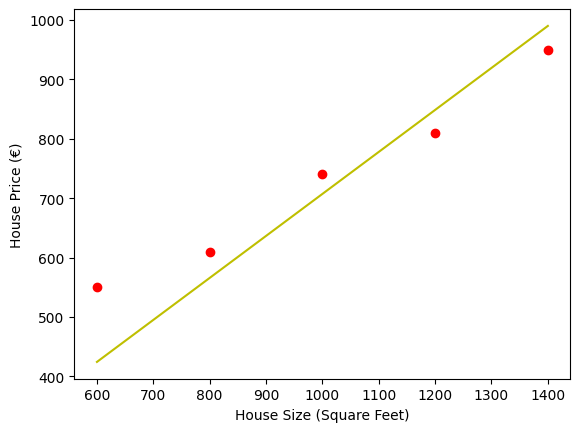

<Figure size 640x480 with 0 Axes>

Final values of m and c: (0.7071751699558539, 0.0025839763312070483)
Cost history: [1820887.208173296, 833274.782535234, 381959.97757202707, 175720.11270480926, 81473.52162365358, 38405.126764466964, 18723.92008175766, 9730.088319994959, 5620.126386404304, 3741.973917248204, 2883.7039717432167, 2491.4954793437314, 2312.265710506638, 2230.362026862867, 2192.9339917750535]


In [65]:
from IPython.display import clear_output, display
import time
import matplotlib.pyplot as plt
cost_history = []
iterations = 15
def train():
  # Training the model
  m, c = -2, 0  # Initial values of parameters
  learning_rate = 3e-7  # You may need to adjust it
  for i in range(iterations):
      print("Iteration number: ", i+1)
      m, c, ch = gradient_descent(house_sizes, house_prices, m, c, learning_rate, 1)
      time.sleep(0.5)  # Sleep for visualization
      clear_output(wait=True)

      preds = hypothesis(m, c, house_sizes)
      plt.plot(house_sizes, house_prices, 'ro')
      plt.plot(house_sizes, preds, 'y-')
      plt.xlabel('House Size (Square Feet)')
      plt.ylabel('House Price (€)')
      plt.show()
      display(plt.gcf())
      cost_history.append(ch[0])

  return m, c, cost_history

m,c, cost_history = train()
print(f'Final values of m and c: {m, c}')
print(f'Cost history: {cost_history[-15:]}')  # Print the last 5 costs to check convergence

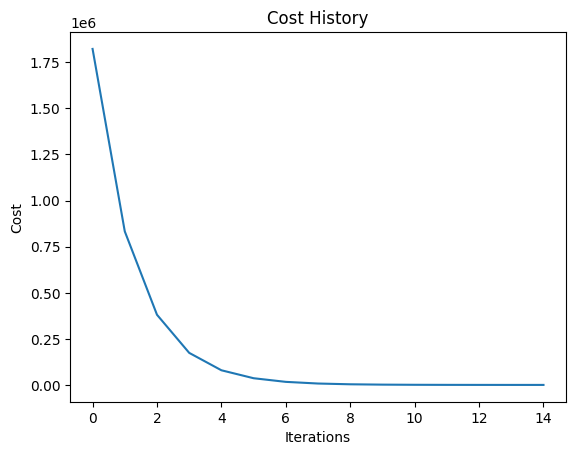

In [66]:
# Plotting the cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

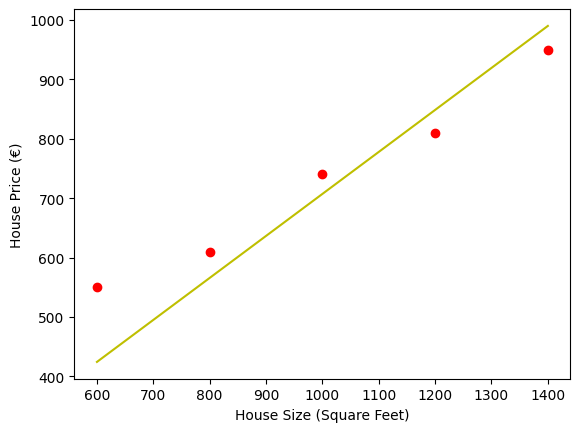

In [67]:
# Plot the final model
preds = hypothesis(m, c, house_sizes)
plt.plot(house_sizes, house_prices, 'ro')
plt.plot(house_sizes, preds, 'y-')
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (€)')
plt.show()


In [68]:
# Inferece
house_size = 1000
predicted_price = hypothesis(m, c, house_size)
print(f'Predicted price for a house of {house_size} sq. ft: €{predicted_price:.2f}')

Predicted price for a house of 1000 sq. ft: €707.18


## Comparison with existing libraries

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset: House sizes (in square feet) and their corresponding prices (in €)
house_sizes = np.array([600, 800, 1000, 1200, 1400]).reshape(-1, 1) # change to a column vector
house_prices = np.array([550, 610, 740, 810, 950])

# Create and train the model
model = LinearRegression()
model.fit(house_sizes, house_prices)

# Make a prediction (example: predict the price of a 1500 sq ft house)
predicted_price = model.predict([[1500]])
print(f'Predicted price for a 1500 sq ft house: {predicted_price[0]:.2f} €')

Predicted price for a 1500 sq ft house: 982.00 €


### What is $\alpha$?


It is very important to choose the correct learning rate $\alpha$. Without it, as shown in the diagram below, the changes to $m$ and $c$ will be too coarse-grained, so the minima is never reached. Or it can be too fine grained so that convergence takes forever to finish. $\alpha$ has to be just right 

![learning-rate.png](./learning_rate.png)


# Main takeaway


### 1. We try to build statistical models which try to learn the distribution of data where there's no straightforward way to deterministically calculate our objective function

### 2. We assumed a linear equation of a line and tried to model the data with the line

### 3. We slowly built up the notion of a loss function, and how to differentiate the loss function to change the parameters of our hypothesis line

### 4. We saw how to manually differentiate the parameters, what is a the role of learning rate and how can we update our line iteratively, in a process commonly known as gradient descent.

# NOTES

### 1. We have assumed a straight line to help us predict the distribution of house prices. ***What we just did, is commonly called as linear regression***. But why a straight line? Why not an exponential function? Why not a degree $3$ polynomial? And why a linear equation? In the coming lectures, we will see how can we generalize this method, so that the programmer doesn't have to explicitly specify the kind of equation to assume
### 2. Of course, for a straight line, differentiating with hand is tedious. How can we generalise this whole process and still differentiate (to minimize loss) scalably?

# see you in the next lecture.